<a href="https://colab.research.google.com/github/safranco8/diplodatos-pdi/blob/main/PDI_TP_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Procesamiento de Imágenes - Diplodatos 2022

Trabajo Práctico

In [ ]:
integrantes = ["Melani Tula", "Santiago Franco", "Pablo Madriaga"]
print(*integrantes, sep="\n")


Melani Tula
Santiago Franco
Pablo Madriaga


Importar las librerías necesarias

In [ ]:
#Instalar la primera vez.
#pip install imageio

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, clear_output

# Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

In [ ]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

In [ ]:
# Función para pasar de espacio RGB a YIQ
def yiq_from_rgb(arr):
    m = np.array([[0.299,      0.587,        0.114],
                 [0.59590059, -0.27455667, -0.32134392],
                 [0.21153661, -0.52273617, 0.31119955]])
    return np.dot(arr, m.T.copy())

In [ ]:
# Función para pasar de espacio YIQ a RGB
def rgb_from_yiq(arr):
    m = np.array([[1, 0.9663, 0.6210],
                 [1, -0.2721, -0.6474],
                 [1, -1.1070, 1.7046]])
    return np.clip(np.dot(arr, m.T.copy()),0.0,1.0)

In [ ]:
def cambiar_luminancia(yiq_image,alpha):
    yiq_image[:,:,0] = yiq_image[:,:,0] * alpha
    return yiq_image

def apply_square(yiq_image):
    return yiq_image[:,:,0]**2
    
def apply_root(yiq_image):
    return np.sqrt(yiq_image[:,:,0])

def linear_filter(x,min_limit,max_limit):
    for y in range(x.shape[0]):
        if x[y] <= min_limit:
            x[y] = 0
        elif(x[y]>=max_limit):
            x[y] = 1
        else:
            x[y] = (x[y]-min_limit)/(max_limit-min_limit)
    return x

def apply_lineal(yiq_image, slider_min, slider_max):
    if(slider_min == slider_max):
        print("El limite inferior debe ser menor al superior")
    else:    
        orig_y = yiq_image[:,:,0]
        modif_y = linear_filter(yiq_image[:,:,0].reshape(-1),slider_min,slider_max)
        return modif_y.reshape(orig_y.shape[0],-1)

def cambiar_saturacion(yiq_image,beta):
    yiq_image[:,:,1] = beta*(yiq_image[:,:,1])
    yiq_image[:,:,2] = beta*(yiq_image[:,:,2])
    return yiq_image

Abrir imágenes de demo incluídas en la biblioteca. Para evitar cargar desde disco, pueden utilizar estas imágenes para resolver el TP. Si utilizan otras adjuntarlas en la entrega para reproducibilidad.

Imageio: 'wikkie.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/wikkie.png (461 kB)
Downloading: 8192/472047 bytes (1.7%)472047/472047 bytes (100.0%)
  Done
File saved as /root/.imageio/images/wikkie.png.


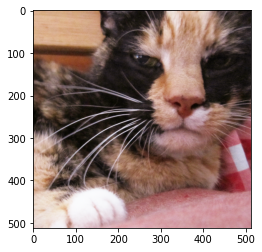

In [ ]:
#Carga y visualización de la imagen
img_rgb = imageio.imread('imageio:wikkie.png') / 255
plt.imshow(img_rgb)

# Otras imágenes (extraído de la documentación de imageio)

# bricks.jpg: A (repeatable) texture of stone bricks
# wood.jpg: A (repeatable) texture of wooden planks
# astronaut.png: Image of the astronaut Eileen Collins
# camera.png: A grayscale image of a photographer
# checkerboard.png: Black and white image of a chekerboard
# chelsea.png: Image of Stefan’s cat
# clock.png: Photo of a clock with motion blur (Stefan van der Walt)
# coffee.png: Image of a cup of coffee (Rachel Michetti)
# coins.png: Image showing greek coins from Pompeii
# horse.png: Image showing the silhouette of a horse (Andreas Preuss)
# hubble_deep_field.png: Photograph taken by Hubble telescope (NASA)
# immunohistochemistry.png: Immunohistochemical (IHC) staining
# moon.png: Image showing a portion of the surface of the moon
# page.png: A scanned page of text
# text.png: A photograph of handdrawn text
# wikkie.png: Image of Almar’s cat

Saving nature-6888085__340.jpg to nature-6888085__340.jpg


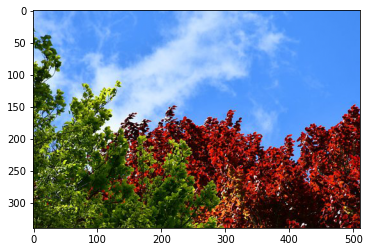

In [ ]:
#@title [Alternativa] Reemplazar por una imagen local
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img_rgb = imageio.imread(img_path) / 255
if(img_rgb.shape[2] == 4):
  img_rgb=img_rgb[:,:,0:3]
plt.imshow(img_rgb)

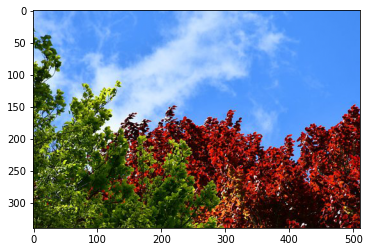

In [ ]:
#@title Imagen original
plt.imshow(img_rgb)

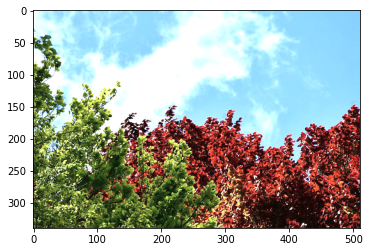

In [ ]:
#@title Imagen con luminancia aumentada
alpha = 1.5
yiq_image = yiq_from_rgb(img_rgb)
yiq_image = cambiar_luminancia(yiq_image,alpha)
plt.imshow(rgb_from_yiq(yiq_image))

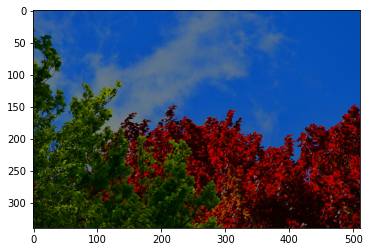

In [ ]:
#@title Imagen con luminancia disminuída
alpha = 0.5
yiq_image = yiq_from_rgb(img_rgb)
yiq_image = cambiar_luminancia(yiq_image,alpha)
plt.imshow(rgb_from_yiq(yiq_image))

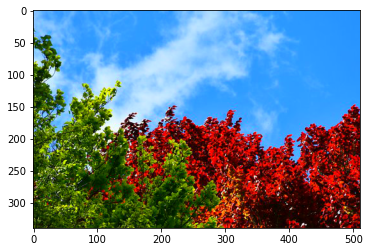

In [ ]:
#@title Imagen con saturación aumentada
beta = 1.5
yiq_image = yiq_from_rgb(img_rgb)
yiq_image = cambiar_saturacion(yiq_image,beta)
plt.imshow(rgb_from_yiq(yiq_image))

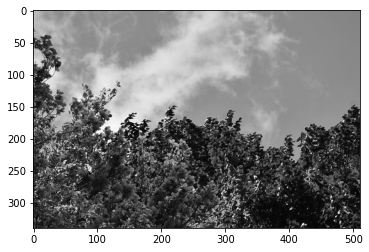

In [ ]:
#@title Imagen con saturación en cero
beta = 0
yiq_image = yiq_from_rgb(img_rgb)
yiq_image = cambiar_saturacion(yiq_image,beta)
plt.imshow(rgb_from_yiq(yiq_image))

# Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

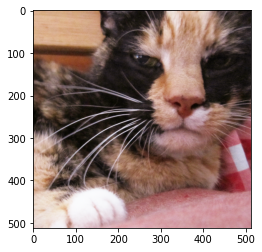

In [ ]:
#Carga y visualización de la imagen
img_rgb_2 = imageio.imread('imageio:wikkie.png') / 255
plt.imshow(img_rgb_2)

# Otras imágenes (extraído de la documentación de imageio)

# bricks.jpg: A (repeatable) texture of stone bricks
# wood.jpg: A (repeatable) texture of wooden planks
# astronaut.png: Image of the astronaut Eileen Collins
# camera.png: A grayscale image of a photographer
# checkerboard.png: Black and white image of a chekerboard
# chelsea.png: Image of Stefan’s cat
# clock.png: Photo of a clock with motion blur (Stefan van der Walt)
# coffee.png: Image of a cup of coffee (Rachel Michetti)
# coins.png: Image showing greek coins from Pompeii
# horse.png: Image showing the silhouette of a horse (Andreas Preuss)
# hubble_deep_field.png: Photograph taken by Hubble telescope (NASA)
# immunohistochemistry.png: Immunohistochemical (IHC) staining
# moon.png: Image showing a portion of the surface of the moon
# page.png: A scanned page of text
# text.png: A photograph of handdrawn text
# wikkie.png: Image of Almar’s cat

Saving nature-6888085__340.jpg to nature-6888085__340 (1).jpg


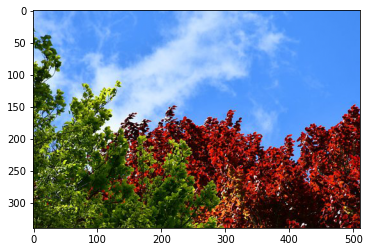

In [ ]:
#@title [Alternativa] Reemplazar por una imagen local
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img_rgb_2 = imageio.imread(img_path) / 255
if(img_rgb_2.shape[2] == 4):
  img_rgb_2=img_rgb_2[:,:,0:3]
plt.imshow(img_rgb_2)

Button(description='Filtro cuadrado', style=ButtonStyle())

Output()

Button(description='Filtro raíz', style=ButtonStyle())

Output()

FloatRangeSlider(value=(0.2, 0.8), description='Rango filtro lineal:', max=1.0, readout_format='.1f', step=0.0…

Button(description='Filtro lineal a trozos', style=ButtonStyle())

Output()

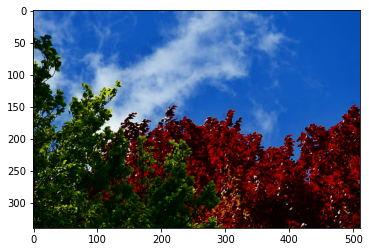

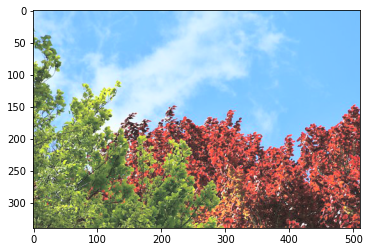

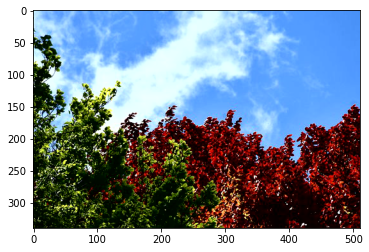

In [ ]:
#@title Cambiar luminancia
button = widgets.Button(description="Filtro cuadrado")
button2 = widgets.Button(description="Filtro raíz")
button3 = widgets.Button(description="Filtro lineal a trozos")
output = widgets.Output()
yiq_image = yiq_from_rgb(img_rgb_2)    

def on_button_clicked(b):
    yiq_image = yiq_from_rgb(img_rgb_2)
    res=yiq_image.copy()
    yiq_res = apply_square(yiq_image)
    res[:,:,0] = yiq_res
    plt.imshow(rgb_from_yiq(res))

def on_button2_clicked(b):
    yiq_image = yiq_from_rgb(img_rgb_2)
    res=yiq_image.copy()
    yiq_res = apply_root(yiq_image)
    res[:,:,0] = yiq_res
    plt.imshow(rgb_from_yiq(res))
    
def on_button3_clicked(b):
    yiq_image = yiq_from_rgb(img_rgb_2)
    res=yiq_image.copy()
    yiq_res = apply_lineal(yiq_image,slider.value[0],slider.value[1])
    res[:,:,0] = yiq_res
    plt.imshow(rgb_from_yiq(res))
    
button.on_click(on_button_clicked)
button2.on_click(on_button2_clicked)
button3.on_click(on_button3_clicked)

display(button, output)
display(button2, output)

slider = widgets.FloatRangeSlider(
    value=[0.2, 0.8],
    min=0,
    max=1,
    step=0.01,
    description='Rango filtro lineal:',
    readout=True,
    readout_format='.1f',
)
display(slider)
display(button3, output)

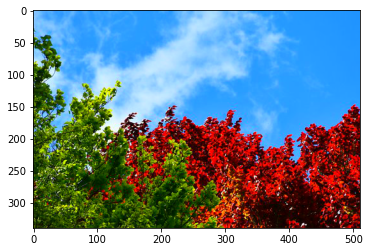

In [ ]:
#@title Cambiar saturacion { run: "auto" }
beta = 1.6 #@param {type:"slider", min:0, max:2, step:0.1}
yiq_image = yiq_from_rgb(img_rgb_2)
yiq_image[:,:,1] = beta*(yiq_image[:,:,1])
yiq_image[:,:,2] = beta*(yiq_image[:,:,2])
plt.imshow(rgb_from_yiq(yiq_image))

In [ ]:
#@title alternativa con jupyter widgets
# output = widgets.Output()
# slider_sat = widgets.FloatSlider(
#     value=1.0,
#     min=0.0,
#     max=2.0,
#     step=0.1,
#     description='Saturacion:',
#     readout_format='.1f',
# )

# def bot_saturacion_clicked(b):
#     output.clear_output()
#     beta = slider_sat.value
#     yiq_image = yiq_from_rgb(img_rgb_2)
#     yiq_image = cambiar_saturacion(yiq_image,beta)
#     with output:
#       plt.imshow(rgb_from_yiq(yiq_image))
    
# bot_saturacion = widgets.Button(description="Cambiar saturacion")
# bot_saturacion.on_click(bot_saturacion_clicked)

# display(slider_sat)
# display(bot_saturacion, output)

# Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

In [ ]:
barlett = np.array([ [1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]]) / 16 

gaussiano3 = barlett

gaussiano5 = np.array([[1, 4,  6,  4,  1],
                      [4, 16, 24, 16, 4],
                      [6, 24, 36, 24, 6],
                      [4, 16, 24, 16, 4],
                      [1, 4,  6,  4,  1]]) / 256

laplaciano = np.array([[ 0, -1,  0],
                       [-1,  4, -1],
                       [ 0, -1,  0]])

sobel_oeste = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

sobel_este = np.array([[1,  0, -1],
                       [2,  0, -2],
                       [1,  0, -1]])

sobel_sur = np.array([[ 1,  2,  1],
                      [ 0,  0,  0],
                      [-1, -2, -1]])

sobel_norte = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

dog = gaussiano5 - np.pad(gaussiano3, pad_width=1)

kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), dtype="float") * (1.0 / (kernel_size * kernel_size))


def convolucion(img, kernel):
    # offset para calcular el padding necesario
    offset = (kernel.shape[0]-1)//2
    # padding para repetir los bordes según el tamaño del kernel
    img_pad = np.pad(img, ((offset, offset),(offset, offset)), mode = 'edge')

    w, h = img.shape

    res = np.zeros(img.shape)
    for i in range(offset, w - offset):
        for j in range(offset, h - offset):
            
            region = img_pad[i-offset:i+offset+1, j-offset:j+offset+1]
            conv = np.sum(region * kernel)
            res[i-offset, j-offset] = conv

    return res

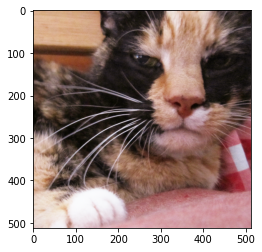

In [ ]:
#@title Carga y visualización de la imagen
img_rgb_3 = imageio.imread('imageio:wikkie.png') / 255
plt.imshow(img_rgb_3)

# Otras imágenes (extraído de la documentación de imageio)

# bricks.jpg: A (repeatable) texture of stone bricks
# wood.jpg: A (repeatable) texture of wooden planks
# astronaut.png: Image of the astronaut Eileen Collins
# camera.png: A grayscale image of a photographer
# checkerboard.png: Black and white image of a chekerboard
# chelsea.png: Image of Stefan’s cat
# clock.png: Photo of a clock with motion blur (Stefan van der Walt)
# coffee.png: Image of a cup of coffee (Rachel Michetti)
# coins.png: Image showing greek coins from Pompeii
# horse.png: Image showing the silhouette of a horse (Andreas Preuss)
# hubble_deep_field.png: Photograph taken by Hubble telescope (NASA)
# immunohistochemistry.png: Immunohistochemical (IHC) staining
# moon.png: Image showing a portion of the surface of the moon
# page.png: A scanned page of text
# text.png: A photograph of handdrawn text
# wikkie.png: Image of Almar’s cat

Saving nature-6888085__340.jpg to nature-6888085__340 (2).jpg


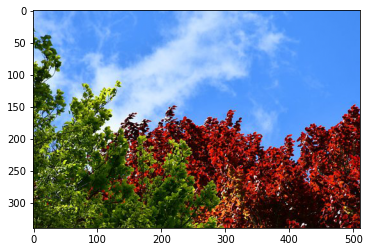

In [ ]:
#@title [Alternativa] Reemplazar por una imagen local
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img_rgb_3 = imageio.imread(img_path) / 255
if(img_rgb_3.shape[2] == 4):
  img_rgb_3=img_rgb_3[:,:,0:3]
plt.imshow(img_rgb_3)

In [ ]:
# Paso la imagen a yiq y tomo el canal y
yiq_image = yiq_from_rgb(img_rgb_3)
y_channel = yiq_image[:,:,0]


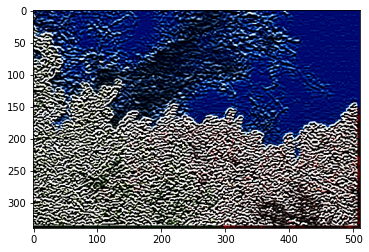

In [ ]:
#@title Elegir transformacion (Se pueden aplicar filtros repetidamente o seleccionar "Original" para comenzar de cero){ run: "auto" }
gamma = 64
conv_kernel_dict = {
    "Barlett": barlett,
    "Gaussiano 3x3": gaussiano3,
    "Gaussiano 5x5": gaussiano5,
    "Laplaciano": laplaciano,
    "Sobel norte": sobel_norte,
    "Sobel sur": sobel_sur,
    "Sobel este": sobel_este,
    "Sobel oeste": sobel_oeste,
    "Dog": dog
}

transformacion = "Dog" #@param ["Barlett", "Gaussiano 3x3", "Gaussiano 5x5", "Laplaciano", "Sobel norte", "Sobel sur", "Sobel este", "Sobel oeste", "Dog", "Original"]
reiniciar_filtro = True

if(transformacion == "Original"):
    y_channel = yiq_from_rgb(img_rgb_3)[:,:,0]
    yiq_image[:,:,0] = y_channel
else:      
    y_channel = convolucion(y_channel,conv_kernel_dict.get(transformacion))

    if (transformacion == "Dog"):
        y_channel = y_channel * gamma
        
    yiq_image[:,:,0] = y_channel
rgb_res = rgb_from_yiq(yiq_image)
plt.imshow(rgb_res)

In [ ]:
#@title alternativa con jupyter widgets
# gamma = 64
# conv_kernel_dict = {
#     "Barlett": barlett,
#     "Gaussiano 3x3": gaussiano3,
#     "Gaussiano 5x5": gaussiano5,
#     "Laplaciano": laplaciano,
#     "Sobel norte": sobel_norte,
#     "Sobel sur": sobel_sur,
#     "Sobel este": sobel_este,
#     "Sobel oeste": sobel_oeste,
#     "Dog": dog
# }
# def bot_filtrar_clicked(b):
#     value = option.value 
#     y_res = convolucion(y_channel,conv_kernel_dict.get(value))
    
#     if (value == "Dog"):
#         y_res = y_res * gamma
        
#     yiq_image[:,:,0] = y_res
#     rgb_res = rgb_from_yiq(yiq_image)
#     plt.imshow(rgb_res)
    
# def bot_reiniciar_clicked(b):
#     y_channel = yiq_from_rgb(img_rgb_3)[:,:,0]
#     yiq_image[:,:,0] = y_channel
#     plt.imshow(rgb_from_yiq(yiq_image))

# option=widgets.RadioButtons(
#             options=['Barlett', 'Gaussiano 3x3', 'Gaussiano 5x5', 'Laplaciano', 'Sobel norte', 'Sobel sur',
#                      'Sobel este', 'Sobel oeste', 'Dog'],
#             layout={'width': 'max-content'}, 
#             description='Seleccione un filtro:',
#             disabled=False
#         )
# bot_filtrar = widgets.Button(description="Aplicar Filtro")
# bot_filtrar.on_click(bot_filtrar_clicked)

# bot_reiniciar = widgets.Button(description="Reiniciar filtros")
# bot_reiniciar.on_click(bot_reiniciar_clicked)

# display(option)
# display(bot_filtrar, output)
# display(bot_reiniciar, output)

# Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat
Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

In [ ]:
# k = tamaño del elemento estructurante
def erosion(img,k=3):
    
    m,n= img.shape 
    centro = (k-1)//2
    #Define new image
    res = np.zeros(img.shape)
    #Erosion without using inbuilt cv2 function for morphology
    for i in range(centro, m-centro):
        for j in range(centro,n-centro):
            res[i,j]= np.min(img[i-centro:i+centro, j-centro:j+centro])
    return res

# k = tamaño del elemento estructurante
def dilatacion(img,k=3):
    
    m,n= img.shape 
    centro = (k-1)//2
    
    res = np.zeros(img.shape)
    
    for i in range(centro, m-centro):
        for j in range(centro,n-centro):
            res[i,j]= np.max(img[i-centro:i+centro, j-centro:j+centro])
    return res

# k = tamaño del elemento estructurante
def mediana(img,k=3):
    
    m,n= img.shape 
    centro = (k-1)//2
    
    res = np.zeros(img.shape)
    
    for i in range(centro, m-centro):
        for j in range(centro,n-centro):
            res[i,j]= np.median(img[i-centro:i+centro, j-centro:j+centro])
    return res

def resta(img,img2):
    return (img - img2 + 1.0) / 2.0

def apertura(img,k):
    res = erosion(img,k)
    res = dilatacion(res,k)
    return res

def cierre(img,k):
    res = dilatacion(img,k)
    res = erosion(res,k)
    return res

def borde_ext(img,k):
    return resta(dilatacion(img,k), img)

def borde_int(img,k):
    return resta(img, erosion(img,k))

def gradiente(img,k):
    return resta(dilatacion(img,k), erosion(img,k))

def top_hat(img,k):
    return resta(img, apertura(img,k))

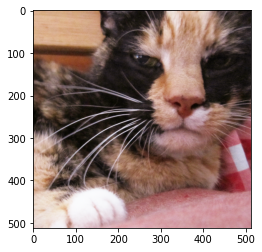

In [ ]:
#@title Carga y visualización de la imagen
img_rgb_4 = imageio.imread('imageio:wikkie.png') / 255
plt.imshow(img_rgb_4)

# Otras imágenes (extraído de la documentación de imageio)

# bricks.jpg: A (repeatable) texture of stone bricks
# wood.jpg: A (repeatable) texture of wooden planks
# astronaut.png: Image of the astronaut Eileen Collins
# camera.png: A grayscale image of a photographer
# checkerboard.png: Black and white image of a chekerboard
# chelsea.png: Image of Stefan’s cat
# clock.png: Photo of a clock with motion blur (Stefan van der Walt)
# coffee.png: Image of a cup of coffee (Rachel Michetti)
# coins.png: Image showing greek coins from Pompeii
# horse.png: Image showing the silhouette of a horse (Andreas Preuss)
# hubble_deep_field.png: Photograph taken by Hubble telescope (NASA)
# immunohistochemistry.png: Immunohistochemical (IHC) staining
# moon.png: Image showing a portion of the surface of the moon
# page.png: A scanned page of text
# text.png: A photograph of handdrawn text
# wikkie.png: Image of Almar’s cat

Saving nature-6888085__340.jpg to nature-6888085__340 (3).jpg


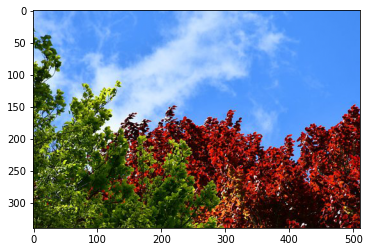

In [ ]:
#@title [Alternativa] Reemplazar por una imagen local
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img_rgb_4 = imageio.imread(img_path) / 255
if(img_rgb_4.shape[2] == 4):
  img_rgb_4=img_rgb_4[:,:,0:3]
plt.imshow(img_rgb_4)

In [ ]:
# Paso la imagen a yiq y tomo el canal y
yiq_image = yiq_from_rgb(img_rgb_4)
y_channel = yiq_image[:,:,0]

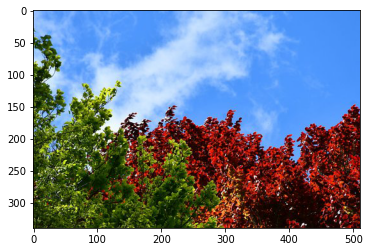

In [ ]:
#@title Elegir transformacion (Se pueden aplicar filtros repetidamente o seleccionar "Original" para comenzar de cero) { run: "auto" }

# tamaño del elemento estructurante
k = 3

transformaciones = {
    "Erosion": erosion,
    "Dilatacion": dilatacion,
    "Apertura": apertura,
    "Cierre": cierre,
    "Borde Externo": borde_ext,
    "Borde Interno": borde_int,
    "Gradiente": gradiente,
    "Top hat": top_hat,
    "Mediana": mediana
}  

transformacion = "Original" #@param ["Original", "Erosion", "Dilatacion", "Apertura", "Cierre", "Borde Externo", "Borde Interno", "Gradiente", "Top hat", "Mediana"]
if(transformacion == "Original"):
    y_channel = yiq_from_rgb(img_rgb_4)[:,:,0]
    yiq_image[:,:,0] = y_channel
else:
    y_channel = transformaciones.get(transformacion)(y_channel,k)
    yiq_image[:,:,0] = y_channel
rgb_res = rgb_from_yiq(yiq_image)
plt.imshow(rgb_res)

In [ ]:
#@title Alternativa con jupyter widgets
# transformaciones = {
#     "Erosion": erosion,
#     "Dilatacion": dilatacion,
#     "Apertura": apertura,
#     "Cierre": cierre,
#     "Borde Externo": borde_ext,
#     "Borde Interno": borde_int,
#     "Gradiente": gradiente,
#     "Top hat": top_hat,
#     "Mediana": mediana
# }  

# def bot_filtrar_clicked(b):
#     value = option.value  
            
#     yiq_image[:,:,0] = transformaciones.get(value)(y_channel,k)
#     rgb_res = rgb_from_yiq(yiq_image)
#     plt.imshow(rgb_res)

# def bot_reiniciar_clicked(b):
#     y_channel = yiq_from_rgb(img_rgb_4)[:,:,0]
#     yiq_image[:,:,0] = y_channel
#     plt.imshow(rgb_from_yiq(yiq_image))    
    
# option=widgets.RadioButtons(
#             options=['Erosión', 'Dilatación', 'Apertura', 'Cierre', 'Borde Externo', 'Borde Interno', 
#                      'Gradiente', 'Top hat', 'Mediana'],
#             layout={'width': 'max-content'}, 
#             description='Seleccione un filtro:',
#             disabled=False
#         )
# bot_filtrar = widgets.Button(description="Aplicar Filtro")
# bot_filtrar.on_click(bot_filtrar_clicked)

# bot_reiniciar = widgets.Button(description="Reiniciar filtros")
# bot_reiniciar.on_click(bot_reiniciar_clicked)

# display(option)
# display(bot_filtrar, output)
# display(bot_reiniciar)

# Ejercicios Optativos. Ver presentación para más detalle
Recordá que hay ejercicios opcionales especificados en la presentación correspondiente al trabajo práctico.